# Regular vs. Multiple Linear Regression

In [1]:
# Step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## New Data

In [2]:
# Step 2
df = pd.read_csv("Advertising.csv", index_col = 0)

## Regular Linear Regression with One of the Dataset's Predictors

In [3]:
# Step 3
# First, do linear regression one at a time using two predictors and find the R-squared value for each.
y = df.Sales
X = df.TV
X = sm.add_constant(X)

In [4]:
# Step 4
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        13:50:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Text(0, 0.5, 'Sales')

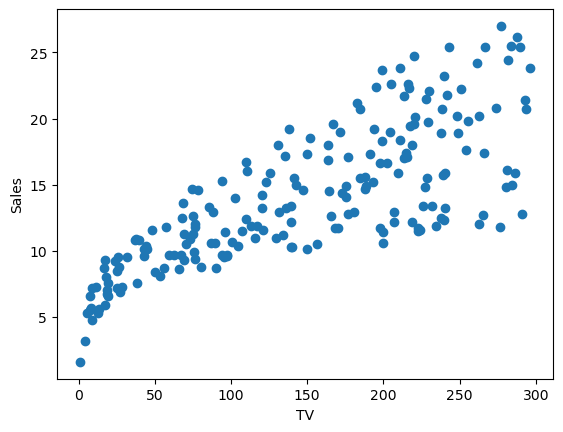

In [5]:
# Step 5
plt.figure()
plt.scatter(df.TV, df.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")

## Regular Linear Regression with Another Predictor

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.35e-19
Time:                        13:50:58   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

Text(0, 0.5, 'Sales')

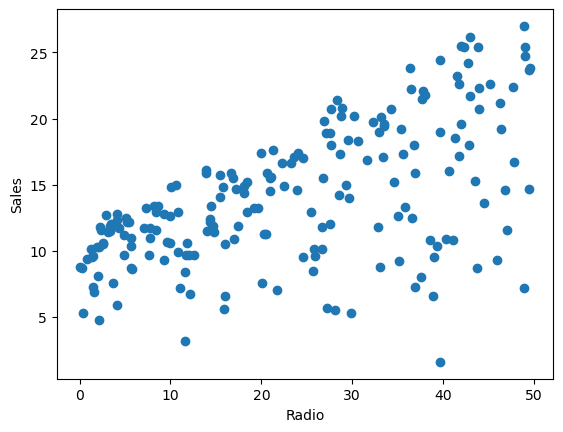

In [6]:
# Step 6
X = df.Radio
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)
plt.figure()
plt.scatter(df.Radio, df.Sales)
plt.xlabel("Radio")
plt.ylabel("Sales")

## Interpreting the Plots and R-squared Values

# Step 7
* We can tell from the plots that 'TV' correlates better with 'Sales' than does 'Radio'.
* The R-squared value for 'TV' is 61.2%.
* The R-squared value for 'Radio' is 33.2%.
* Together, should they explain 99.4% of the variation in 'Sales'?

## Multiple linear regression is just linear regression with more than one independent variable.

In [7]:
# Step 8
X = df[["TV", "Radio"]]
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.83e-98
Time:                        13:50:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

## Let's see the multi regression in a three-D plot.

/var/folders/3b/s6fvjch545vdgjngslp7sv1m0000gn/T/ipykernel_4113/3633986552.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[2]) * (y_axis)


Text(0.5, 0, 'Sales')

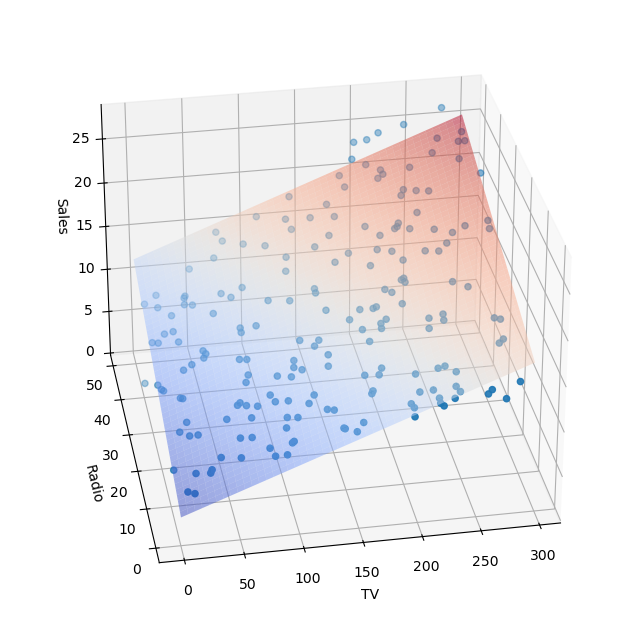

In [8]:
# Step 9
from mpl_toolkits.mplot3d import Axes3D

# Use the ranges of values in the 'TV' and 'Radio' variables to work out the first two axes for the 3D plot.
x_axis, y_axis = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), np.linspace(X.Radio.min(), X.Radio.max(), 100))

z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[2]) * (y_axis)

# Generate 3D axes.
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection='3d', azim=-100)

# finally the plotting
ax.plot_surface(x_axis, y_axis, z_axis, cmap = plt.cm.coolwarm, alpha = 0.5, linewidth = 0)
ax.scatter(X.TV, X.Radio, y)
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")

You can see that the "linear discriminant" our regression found is a plane.

## Interpreting the R-squared Values

# Step 10
* We get an R-squared value of 89.7%.
* This is less than 94.4%.
* Why would that be the case? (Make sure to think about the plots, not just the R-squared numbers.)